###  CORTX Metrics Compare Open Source Projects 

This jupyter notebook does some analysis and graphing comparing various open source object storage systems

In [2]:
%%capture
%cd /home/johnbent/cortx/metrics
import os
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cortx_community as cc
import cortx_graphing as cg
import datetime
from github import Github

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display("text/html", "<style>.container { width:100% !important; }</style>")
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [3]:
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.markersize'] = 10

sf_data=cc.ProjectComparisons().get_stats()
star_data=sf_data['stars']
fork_data=sf_data['forks']
watch_data=sf_data['watchers']

slack_user = cc.ReadPickle("./pickles/slack_users_stats.pickle")
slack_users_data = slack_user.read_pickle()

#star_data.keys() | fork_data.keys()


In [4]:
def get_dataframe(data):
    def add_items_to_df(df,name,items):
        if name == 'CORTX':
            print("adding %d items to CORTX" % (len(items)), items)
        df1=pd.DataFrame(data={name : items})
        return pd.concat([df, df1], axis=1) 
    
    largest=0
    name_of_largest = None
    for k,v in data.items():
        if len(v[1]) > largest:
            largest = len(v[1])
            name_of_largest = k
    df=pd.DataFrame(index=data[name_of_largest][0],data={ name_of_largest : data[name_of_largest][1] })
    for k,v in data.items():
        if k is not name_of_largest:
            df=add_items_to_df(df,k,v[1])
    return df

def dict_to_dataframe(data):
    enrich_data = {}
    for date in data.keys():
        enrich_data[date] = {}
        for key, workspace in data[date].items():
            enrich_data[date].update({key: workspace['counts']['everyone']})
    df = pd.DataFrame.from_dict(enrich_data, orient='index')
    df.fillna(method='ffill')
    df = df.dropna(how='all', axis=0)
    return df


def plot_graph(data):
    styles = ['bs-', 'rs-', 'ys-', 'gs-', 'cs-', 'ms-', 'ks-',
              'bo-', 'ro-', 'yo-', 'go-', 'co-', 'mo-', 'ko-',
              'b^-', 'r^-', 'y^-', 'g^-', 'c^-', 'm^-', 'k^-',
              ]
    ylim = (0, None)
    ax = data.plot(title="Slack User Count", ylim=ylim, style=styles)
    (min_x, max_x) = ax.get_xlim()
    max_x *= 1.1  # extend x-axis temporarily since some projects only currently have one datapoint
    plt.xlim(min_x, max_x)
    plt.legend(loc='upper left')
    plt.show()

    
def get_dataframe2(data):
    def add_items_to_df(df,name,items):
        df1=pd.DataFrame(data={name : items})
        return pd.concat([df, df1], axis=1) 
    
    # collect all indices from all data sets
    tmp_indices=set()
    for k,v in data.items():
        tmp_indices |= set(v[0])
    indices=list(sorted(tmp_indices))
    
    # collect all data from all data set using the union of the indices
    all_data={}
    for k,v in data.items():
        data=[]
        for i in indices:
            found = False
            for j in range(len(v[1])):
                if v[0][j] == i:
                    data.append(v[1][j])
                    found = True
            if not found:
                data.append(None)
        all_data[k]=data
    df=pd.DataFrame(index=indices,data=all_data)
    return df.fillna(method='ffill')

def make_graph(df,data,end_day,title,what):
    def get_max_y(data):
        max_y=0
        for k,v in data.items():
            try:
                this_max = v[1][end_day]
            except IndexError:
                this_max = v[1][-1]
            max_y = max(max_y,this_max)
        return max_y * 1.1 # increase it by 10% to add some margin at top of graph

    if end_day:
        max_y=get_max_y(data)
    else:
        max_y=None
    ax=df.plot(xlim=(0,end_day),ylim=(0,max_y),title="%s %s Data" % (title,what))
    ax.set_ylabel('%s Count' % what)
    ax.set_xlabel('Day')
    plt.show()

The next four graphs compare CORTX to a variety of other open source object storage systems.  All graphs normalize the data for each project to each's respective "day zero". Stars are more of a reflection of popularity and marketing whereas forks are a reflection of a much deeper interest in the software.

adding 434 items to CORTX [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 13, 16, 20, 20, 24, 25, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 39, 40, 88, 122, 125, 134, 144, 148, 152, 152, 155, 155, 156, 157, 159, 164, 166, 167, 168, 169, 174, 176, 177, 177, 177, 177, 177, 179, 181, 184, 185, 185, 186, 188, 190, 200, 203, 205, 205, 205, 208, 208, 211, 211, 212, 213, 213, 214, 214, 214, 215, 216, 216, 218, 218, 218, 220, 221, 221, 221, 221, 222, 222, 222, 223, 224, 224, 224, 225, 226, 227, 229, 230, 232, 233, 235, 237, 237, 237, 237, 237, 238, 2

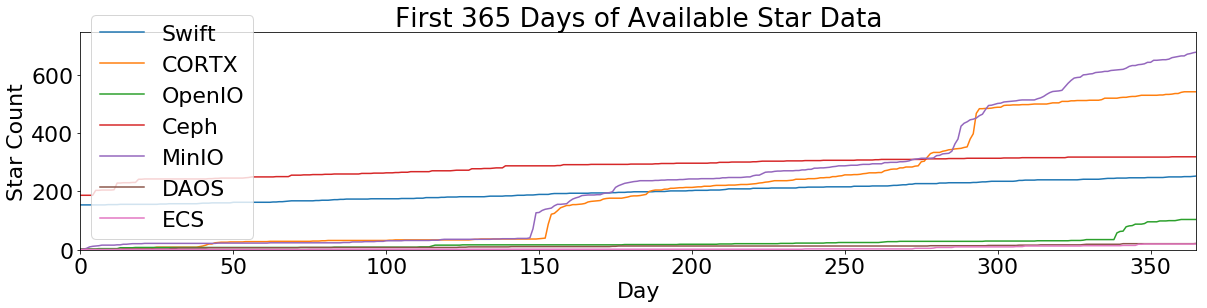

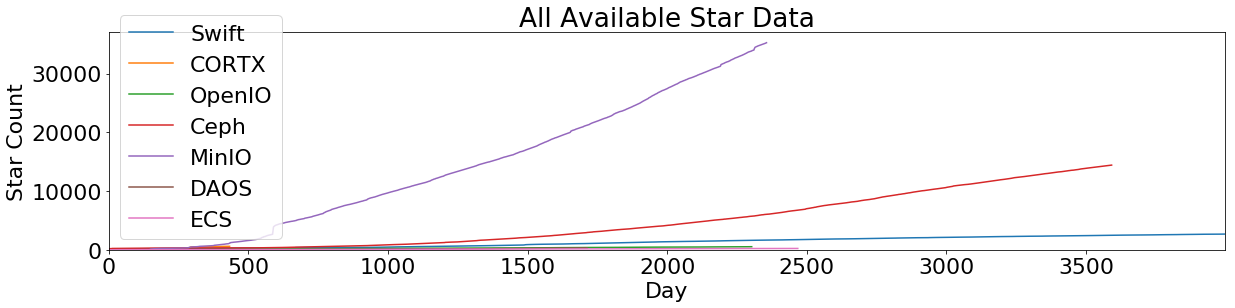

adding 281 items to CORTX [26, 42, 45, 62, 70, 77, 82, 83, 87, 87, 105, 113, 115, 121, 127, 128, 128, 130, 131, 133, 135, 136, 136, 136, 137, 142, 148, 161, 164, 166, 166, 167, 170, 171, 176, 177, 177, 177, 178, 188, 190, 191, 191, 192, 192, 199, 201, 203, 205, 205, 206, 206, 206, 207, 208, 210, 211, 212, 212, 212, 212, 212, 213, 216, 217, 217, 218, 219, 222, 222, 222, 223, 223, 223, 226, 226, 228, 232, 232, 232, 232, 233, 235, 237, 240, 241, 241, 242, 242, 243, 245, 247, 247, 247, 249, 250, 252, 252, 259, 259, 259, 260, 261, 262, 266, 268, 269, 269, 272, 272, 275, 281, 284, 284, 284, 286, 288, 291, 298, 299, 303, 303, 312, 312, 325, 348, 353, 355, 355, 364, 377, 386, 393, 398, 399, 400, 404, 404, 426, 444, 452, 452, 452, 453, 454, 456, 457, 460, 460, 460, 460, 464, 464, 466, 466, 467, 467, 467, 470, 476, 477, 478, 478, 478, 479, 480, 484, 488, 490, 493, 493, 504, 506, 510, 511, 514, 515, 516, 518, 518, 520, 523, 527, 527, 528, 528, 529, 531, 533, 534, 535, 535, 535, 538, 539, 540, 541

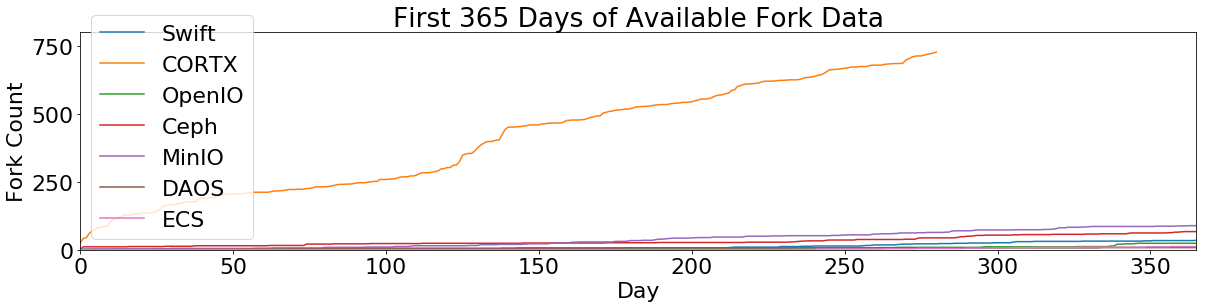

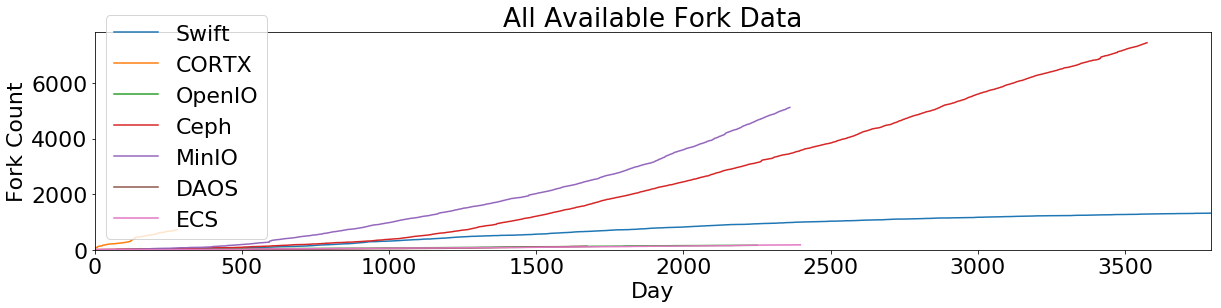

In [5]:
# watcher graphs
# somehow the watcher for CORTX has initial data from before we went open source
# today is April 9, 2021.  "Day Zero" for CORTX was 197 days ago.  So manually adjust the data
if False:
    watch_data['CORTX'] = (watch_data['CORTX'][0][0:197],watch_data['CORTX'][1][-198:])
    print(watch_data['CORTX'])
    print(len(watch_data['CORTX'][1]))
    print(len(watch_data['CORTX'][0]))
    #print(watch_data['CORTX'])
    df=get_dataframe(watch_data)
    print(df.head(197))
    make_graph(df=df,data=watch_data,end_day=365,title="First 365 Days of Available",what='Watchers')
    make_graph(df=df,data=watch_data,end_day=None,title="All Available",what='Watchers')

# star graphs
df=get_dataframe(star_data)
make_graph(df=df,data=star_data,end_day=365,title="First 365 Days of Available",what='Star')
make_graph(df=df,data=star_data,end_day=None,title="All Available",what='Star')

# fork graphs
df=get_dataframe(fork_data)
make_graph(df=df,data=fork_data,end_day=365,title="First 365 Days of Available",what='Fork')
make_graph(df=df,data=fork_data,end_day=None,title="All Available",what='Fork')

The graphs below compare each project using absolute dates on the horizontal axis and every scraped metric on the vertical.

In [48]:
#print(fork_data)
#print(len(fork_data['CORTX'][1]))
cortx_age=len(fork_data['CORTX'][0])
max_age=len(fork_data['Swift'][0])
exclude=['OpenIO', 'ECS']
exclude=[]

def get_slope(List,start,end,adjust_end=False):
    while List[start] == 0:
        start += 1
        if adjust_end:
            end += 1
    if end > len(List) - 1:
        end = len(List) - 1
    start_value = List[start]
    end_value = List[end]
    length = end - start
    try:
        ret = (end_value - start_value) / length
    except ZeroDivisionError:
        ret = 0
    #print("Slope of %s in range %d:%d is %.2f" % (p,start,end,ret))
    return ret
    
# searches an array looking for the largest delta using a 30 slot interval    
def max_slope(List,delta):
    ms=0
    for i in range (0,len(List)):
        s=get_slope(List,i,i+delta,True)
        ms = max(ms,s)
    return ms

def make_slope_bars(fork_data,cortx_age):
    projects = sorted(fork_data.keys())
    data = { 'all_time' : [], 
             'first_year'  : [],
             'year_before_cortx' : [],
             'FY21' : [],
             'max_month' : []
           }
    index=[]
    for p in projects:
        if p in exclude:
            continue
        index.append(p)
        forks=fork_data[p][1]
        age = len(forks)
        if p == 'CORTX':
            data['year_before_cortx'].append(0)
            #data['since_cortx'].append(0)
        else:
            data['year_before_cortx'].append(get_slope(forks, age - cortx_age - 365, age - cortx_age,age))
        data['FY21'].append(get_slope(forks,age - cortx_age,age))
        data['first_year'].append(get_slope(forks,0,365,True))
        data['all_time'].append(get_slope(forks,0,age))
        data['max_month'].append(max_slope(forks,30))
        #slope_previous_year = get_slope(new_list, max_age - cortx_age - 365, max_age - cortx_age, max_age)

    df = pd.DataFrame(data, index=index)
    print(df)
    ax = df.plot.bar(rot=0)
    plt.title('Average Forks Per Day')
    plt.text(0.2,1,"N/A",rotation="vertical")
    plt.show()
    
    data.pop('year_before_cortx')
    df = pd.DataFrame(data, index=index)
    ax = df.plot.bar(rot=0)
    plt.title('Average Forks Per Day')
    plt.show()
    
    data.pop('all_time')
    data.pop('first_year')
    df = pd.DataFrame(data, index=index)
    ax = df.plot.bar(rot=0)
    plt.title('Average Forks Per Day')
    plt.show()
    
    data.pop('max_month')
    df = pd.DataFrame(data, index=index)
    ax = df.plot.bar(rot=0)
    plt.title('Average Forks Per Day')
    plt.show()
    
    

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html
def get_spliced_lists(fork_data,splice):
    projects=fork_data.keys()
    new_lists={}
    for p in projects:
        if p in exclude:
            continue
        p_age=len(fork_data[p][0])
        print(p, ' is this many days old ', p_age)
        missing_days = max_age - p_age
        new_list = [0] * missing_days + fork_data[p][1]
        new_list_spliced = new_list[::splice]
        new_lists[p] = new_list_spliced
        spliced_size=len(new_lists[p])
    return new_lists

def make_spliced_graphs(fork_data,splice,label):
    new_lists = get_spliced_lists(fork_data,splice)
    df=pd.DataFrame.from_dict(new_lists,orient='index').transpose()

    #print(df)
    #print(df.pct_change())
    df_pct_change=df.pct_change()
    #ax = df_pct_change.plot.bar(rot=0)
    df_pct_change.plot()
    #plt.legend(loc='upper center')
    plt.title('%s Percentage Growth in Forks' % label)
    plt.show()
    print("Everyone starts with good percentage growth.  But percentage growth gets hard to sustain as the population grows.")

    df.plot()
    plt.title('%s Total Fork Count' % label)
    plt.show()
    print("When CORTX shows up, it has a lower slope than Ceph and MinIO and does not affect their slopes.  Object storage open source communities are not a zero sum game.")
    
    df = df.diff()
    df.plot()
    plt.title('%s Fork Growth' % label)
    plt.show()
    print("When CORTX shows up, it has a lower slope than Ceph and MinIO and does not affect their slopes.  Object storage open source communities are not a zero sum game.")

            FY21  all_time  first_year  max_month  year_before_cortx
CORTX   2.507143  2.507143    2.507143   5.900000           0.000000
Ceph    3.232143  2.083940    0.178082   4.966667           3.320548
DAOS    0.164286  0.075957    0.019178   1.000000           0.112329
ECS     0.114286  0.073842    0.030137   1.000000           0.090411
MinIO   4.360714  2.168996    0.241096   5.466667           3.575342
OpenIO  0.050000  0.072000    0.063014   1.000000           0.093151
Swift   0.164286  0.347757    0.093151   1.133333           0.180822


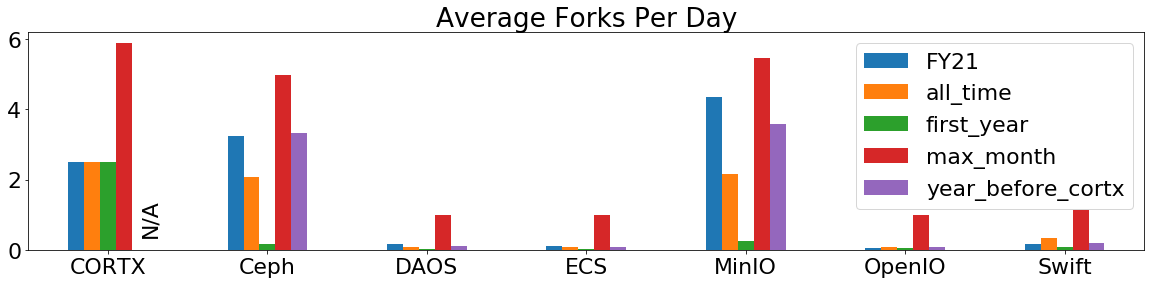

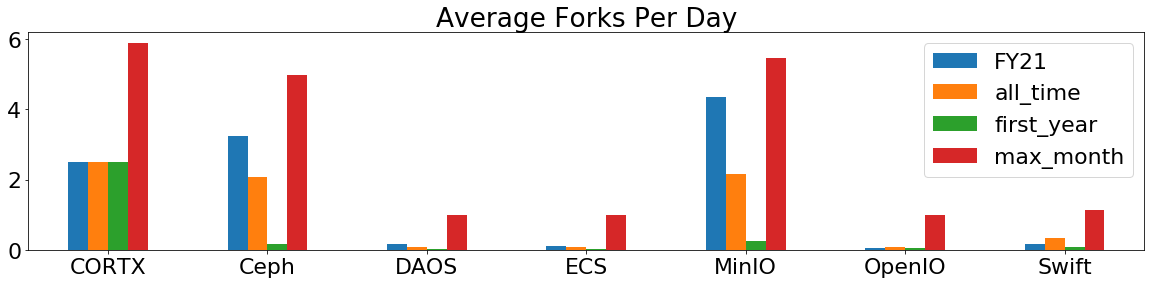

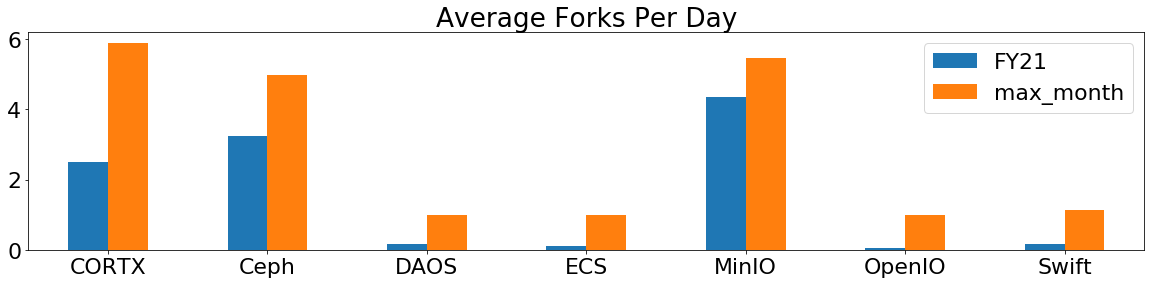

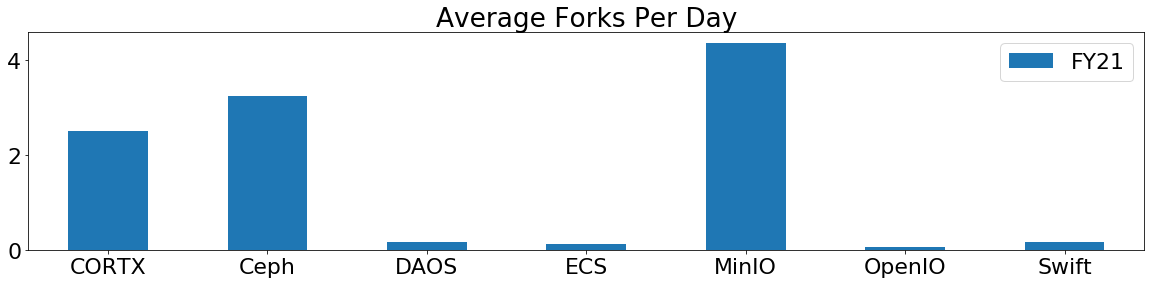

In absolute numbers, we had the best first year.  We have had the best ever single month of growth. However, since CORTX has been around, MinIO and Ceph are beating it in daily absolute growth.  But not daily percentage growth.
Swift  is this many days old  3791
CORTX  is this many days old  281
OpenIO  is this many days old  2251
Ceph  is this many days old  3575
MinIO  is this many days old  2362
DAOS  is this many days old  1673
ECS  is this many days old  2398


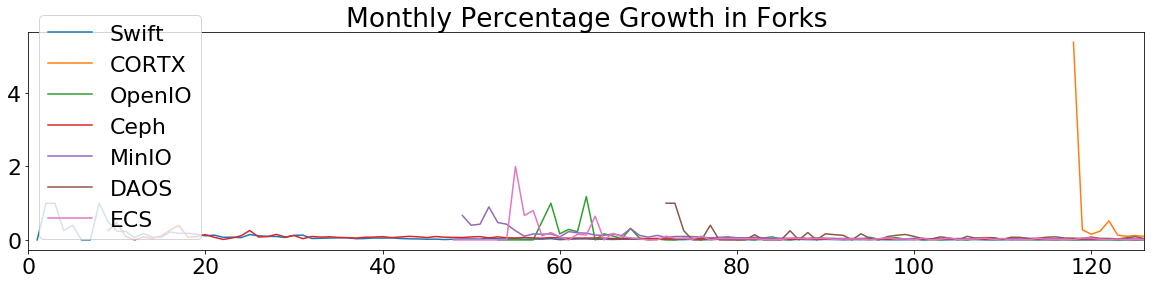

Everyone starts with good percentage growth.  But percentage growth gets hard to sustain as the population grows.


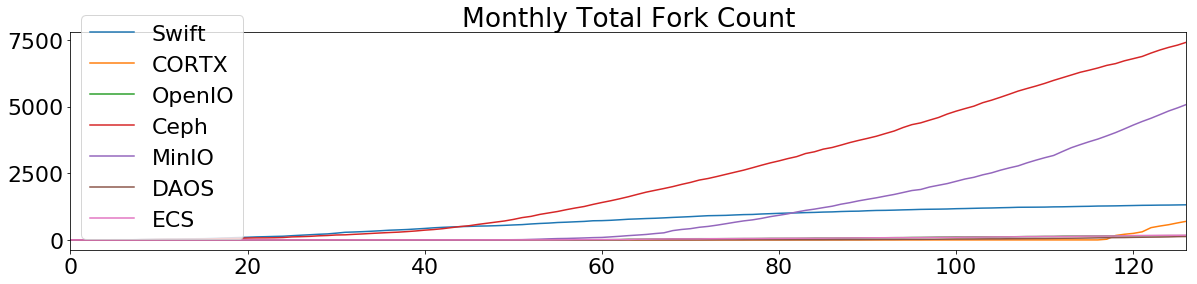

When CORTX shows up, it has a lower slope than Ceph and MinIO and does not affect their slopes.  Object storage open source communities are not a zero sum game.


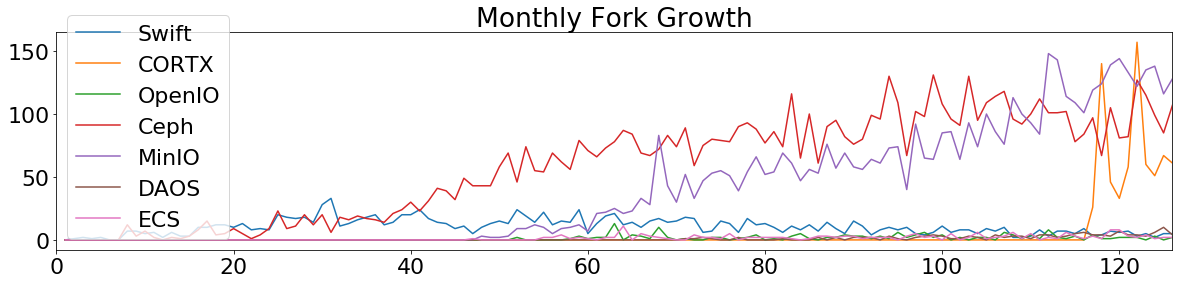

When CORTX shows up, it has a lower slope than Ceph and MinIO and does not affect their slopes.  Object storage open source communities are not a zero sum game.
Swift  is this many days old  3791
CORTX  is this many days old  281
OpenIO  is this many days old  2251
Ceph  is this many days old  3575
MinIO  is this many days old  2362
DAOS  is this many days old  1673
ECS  is this many days old  2398


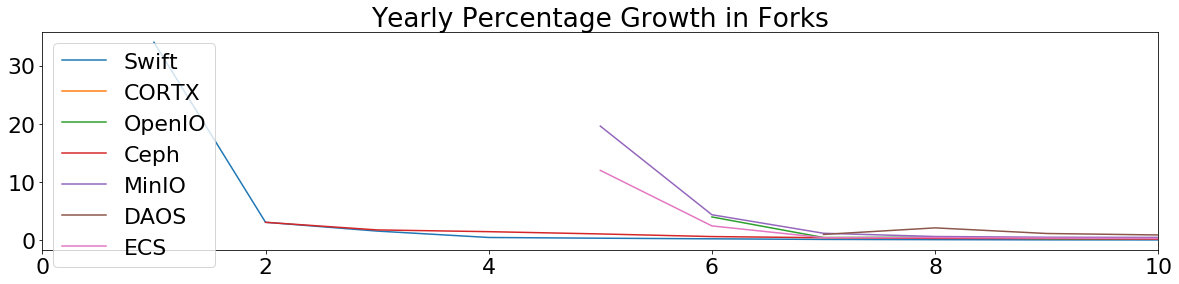

Everyone starts with good percentage growth.  But percentage growth gets hard to sustain as the population grows.


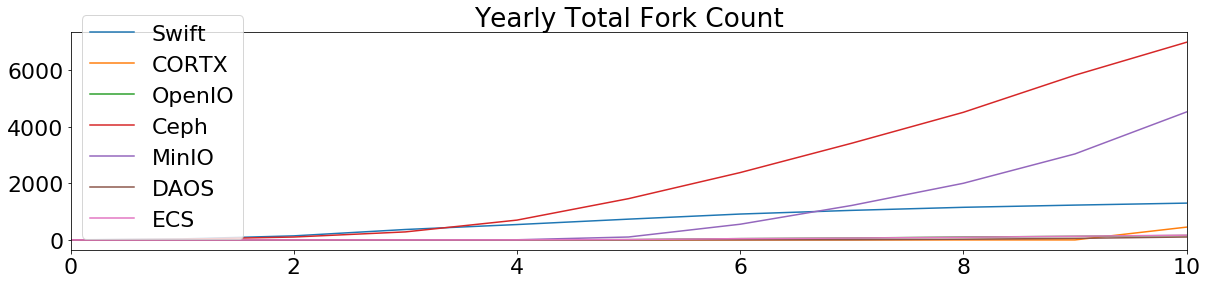

When CORTX shows up, it has a lower slope than Ceph and MinIO and does not affect their slopes.  Object storage open source communities are not a zero sum game.


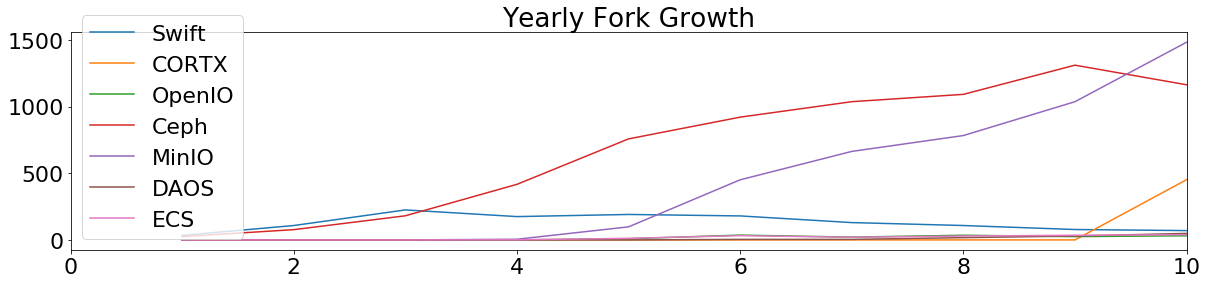

When CORTX shows up, it has a lower slope than Ceph and MinIO and does not affect their slopes.  Object storage open source communities are not a zero sum game.
Swift  is this many days old  3791
CORTX  is this many days old  281
OpenIO  is this many days old  2251
Ceph  is this many days old  3575
MinIO  is this many days old  2362
DAOS  is this many days old  1673
ECS  is this many days old  2398


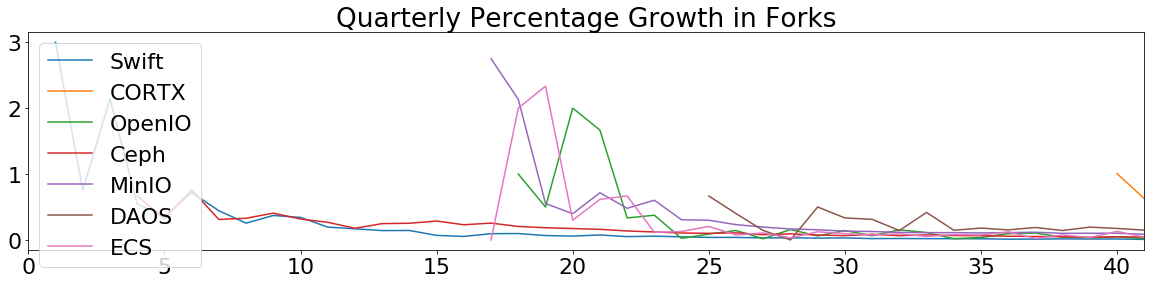

Everyone starts with good percentage growth.  But percentage growth gets hard to sustain as the population grows.


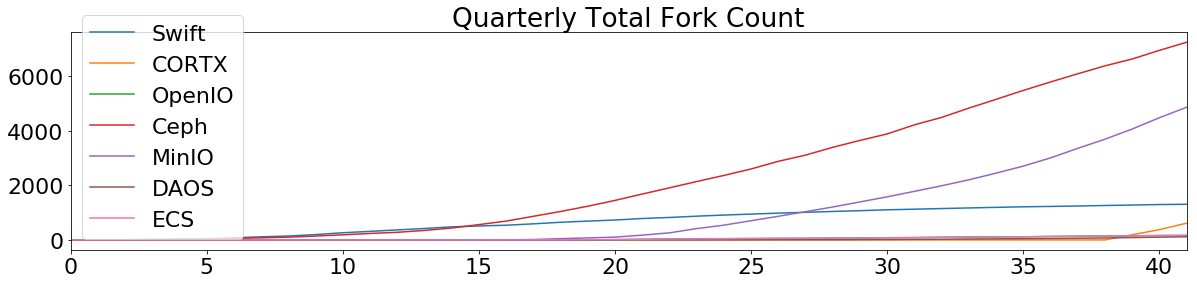

When CORTX shows up, it has a lower slope than Ceph and MinIO and does not affect their slopes.  Object storage open source communities are not a zero sum game.


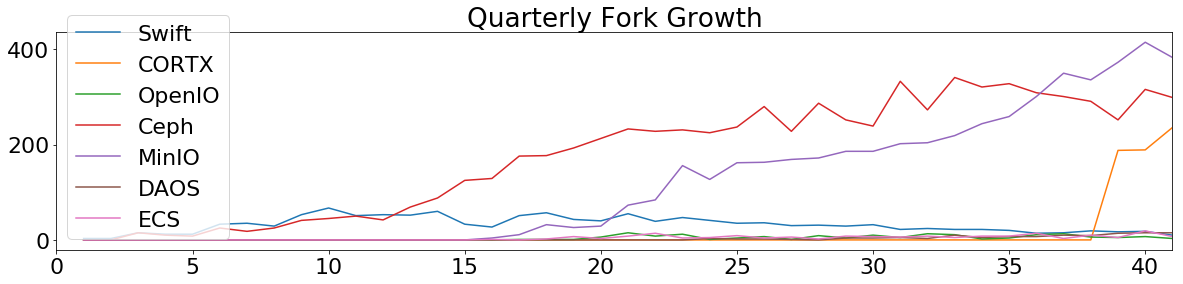

When CORTX shows up, it has a lower slope than Ceph and MinIO and does not affect their slopes.  Object storage open source communities are not a zero sum game.


In [49]:
make_slope_bars(fork_data,cortx_age)
print("In absolute numbers, we had the best first year.  We have had the best ever single month of growth. However, since CORTX has been around, MinIO and Ceph are beating it in daily absolute growth.  But not daily percentage growth.")

#make_spliced_graphs(fork_data,splice=7,label="Weekly")
make_spliced_graphs(fork_data,splice=30,label="Monthly")
make_spliced_graphs(fork_data,splice=365,label="Yearly")
make_spliced_graphs(fork_data,splice=91,label="Quarterly")

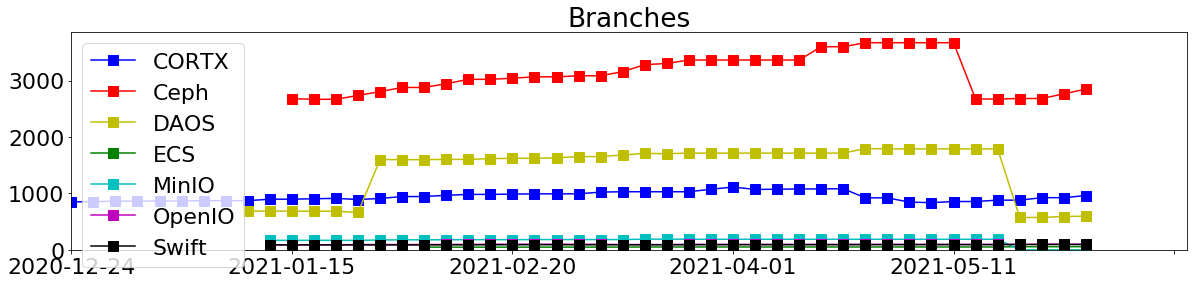

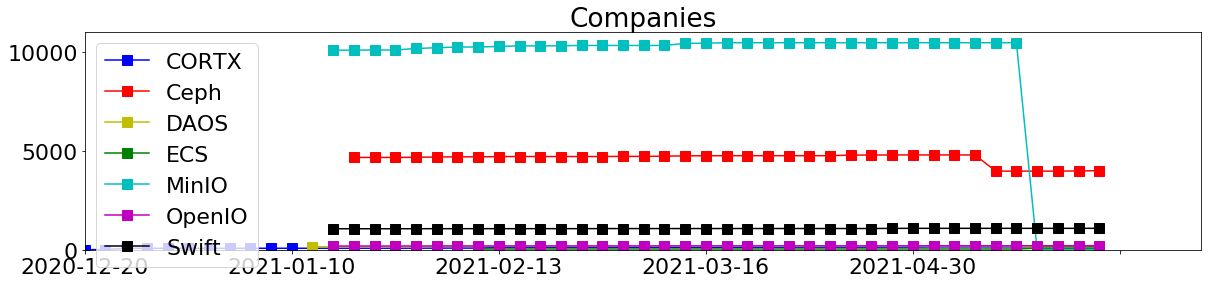

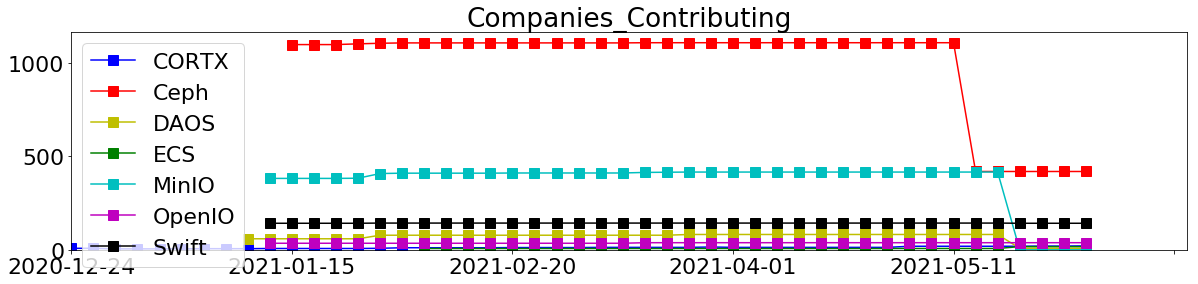

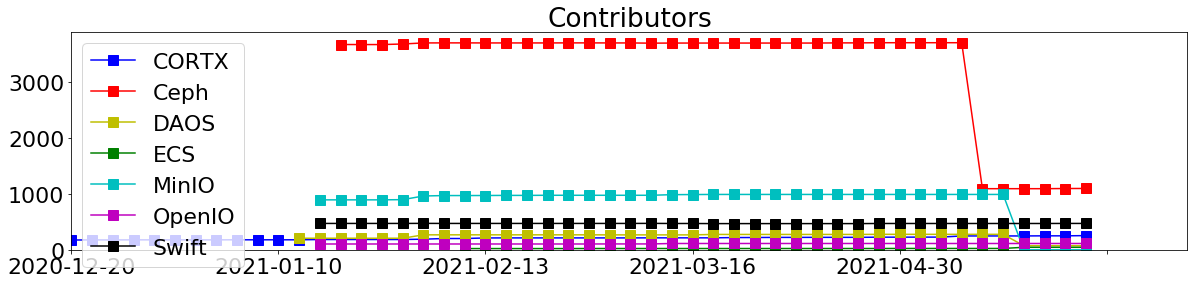

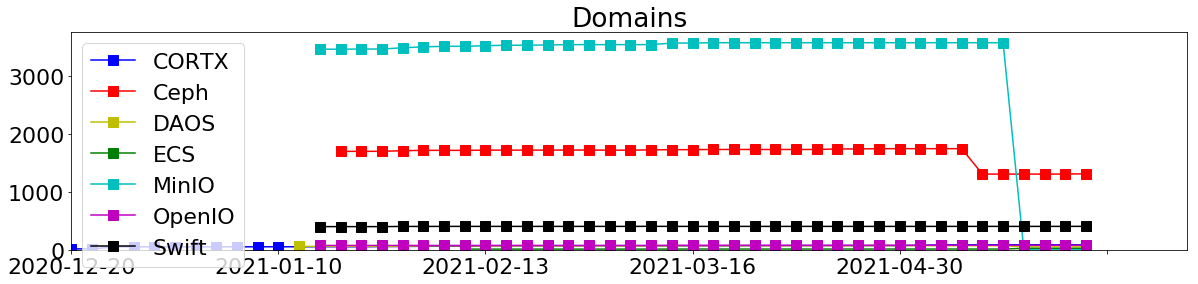

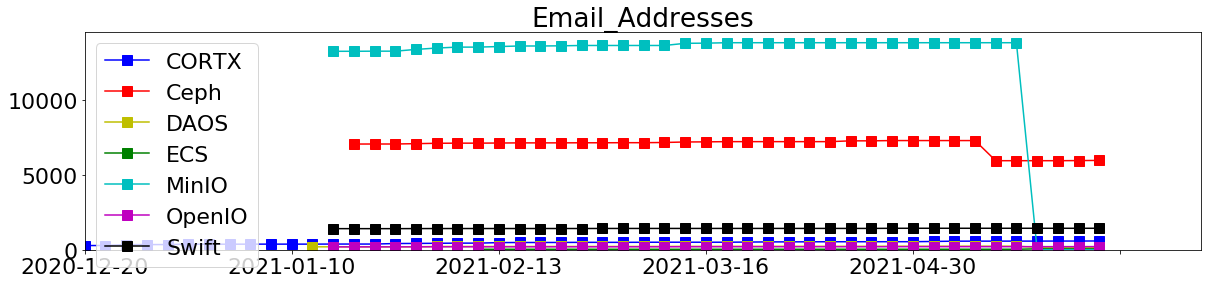

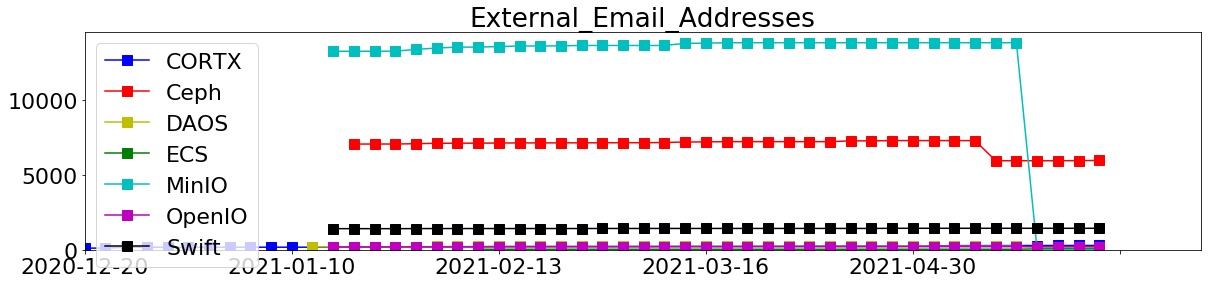

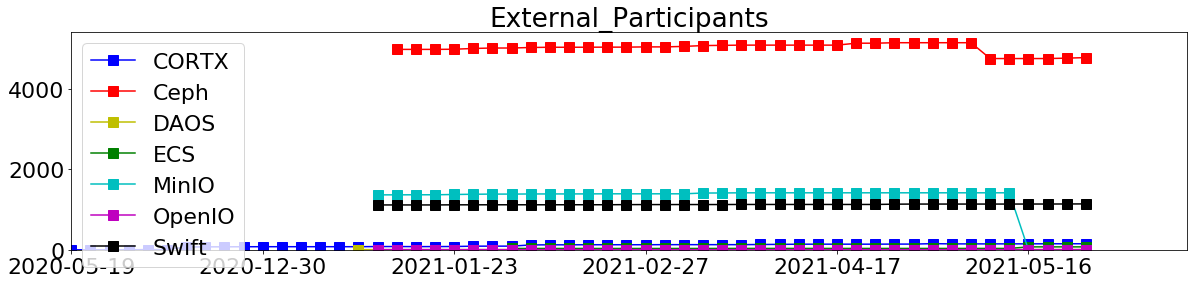

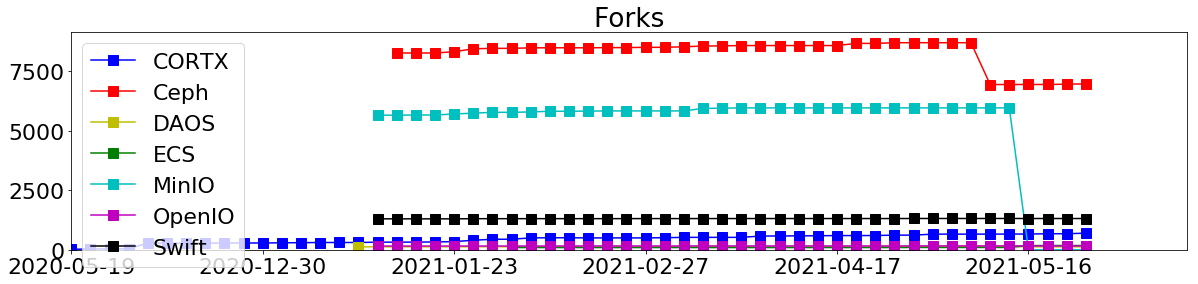

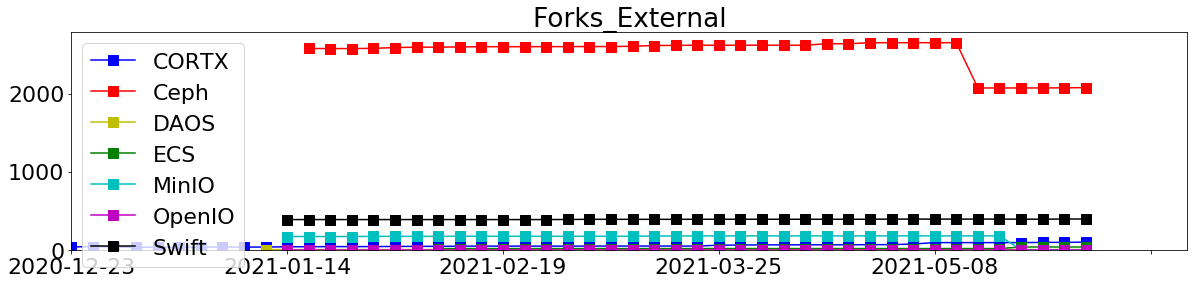

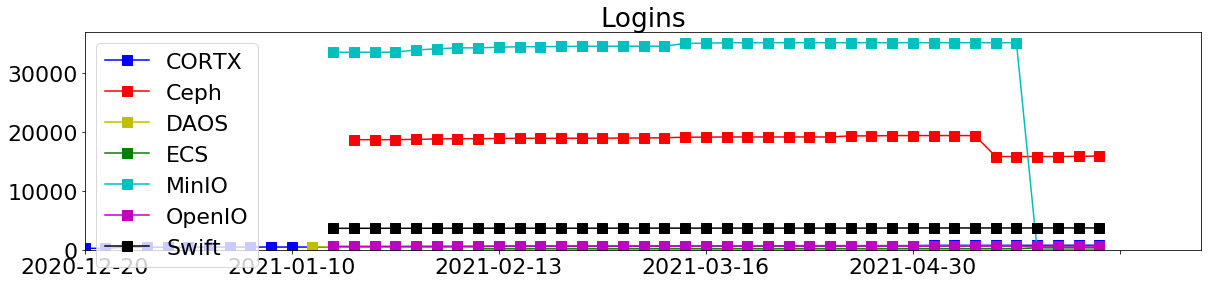

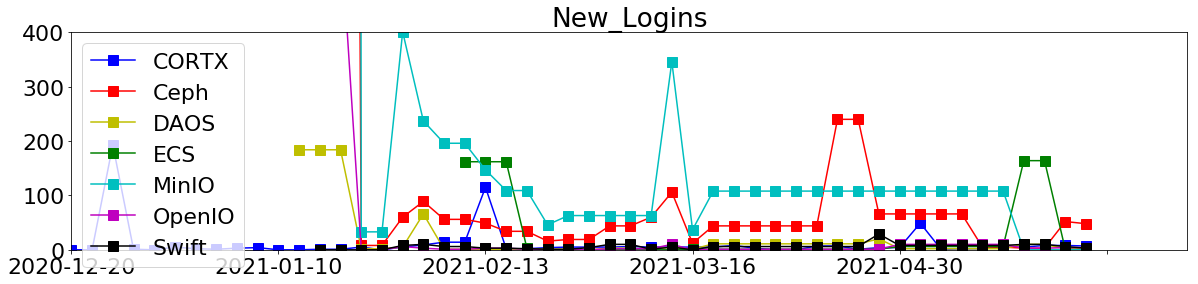

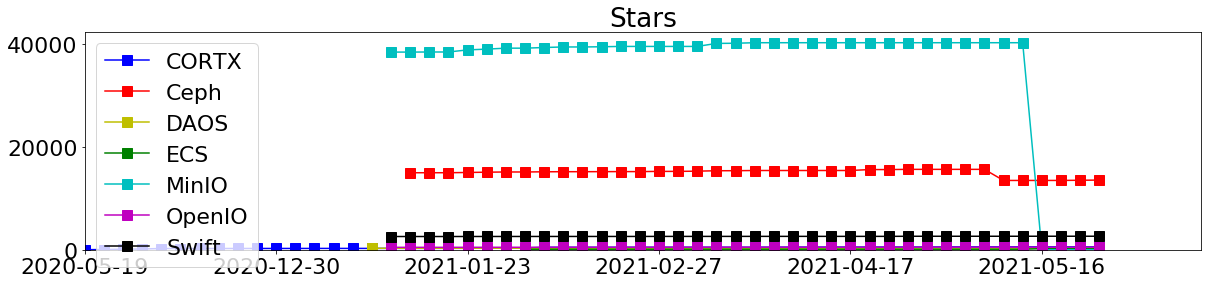

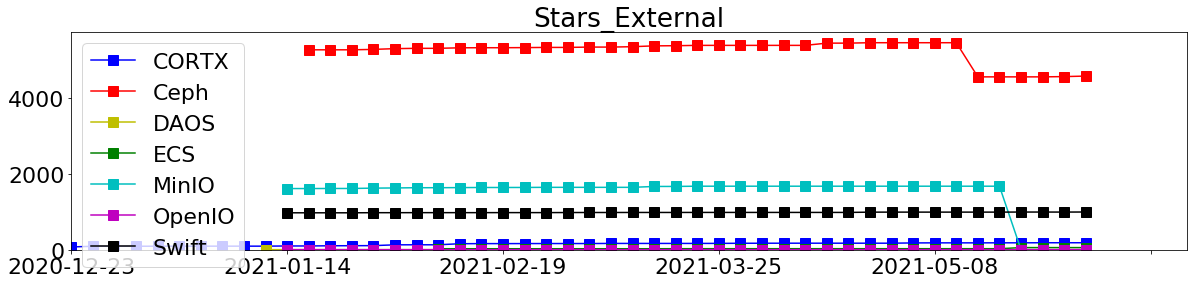

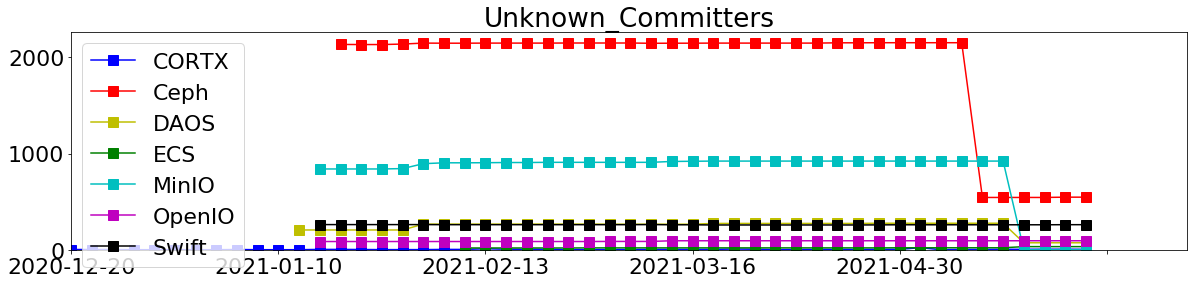

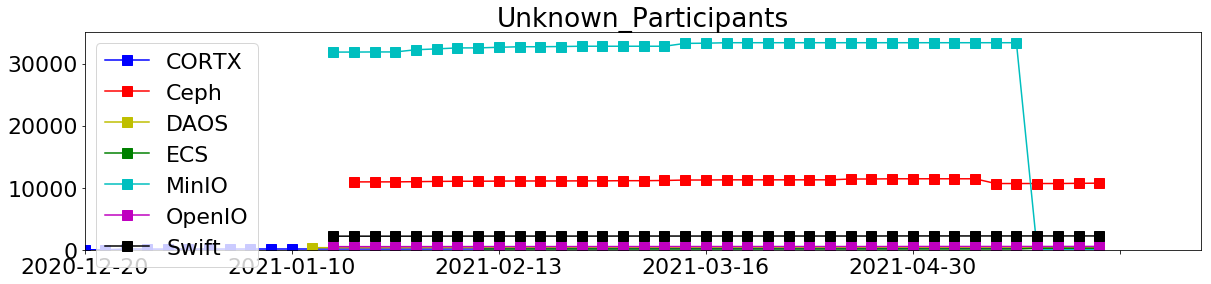

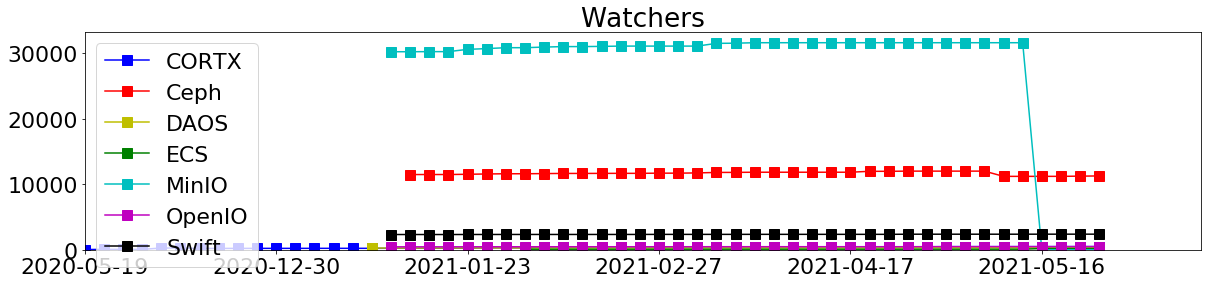

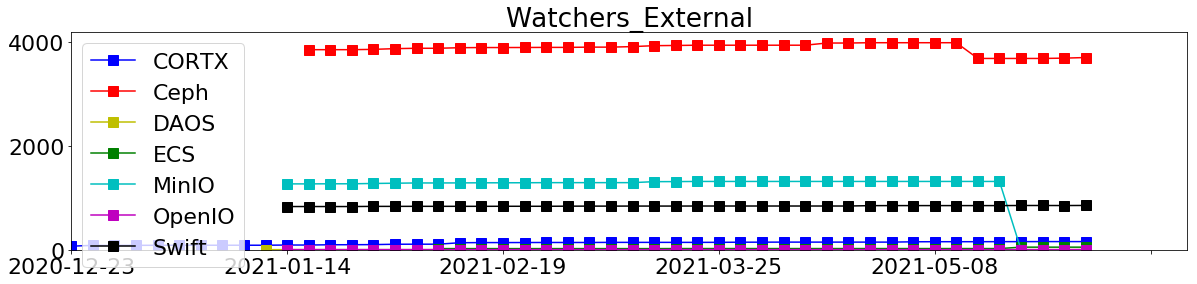

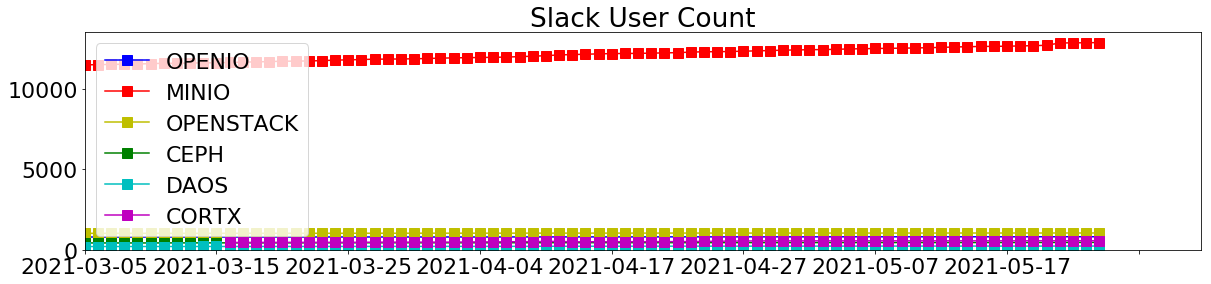

In [6]:
rname='GLOBAL'
def get_dataframe3(stats,key):
    data={}
    for org,values in stats.items():
        dates=[pd.to_datetime(k) for k in values.get_dates(rname)] # this might be better but isn't working...
        dates=values.get_dates(rname)
        values=values.get_values_as_numbers(rname,key)
        data[org]=(dates,values)
    df = get_dataframe2(data)
    df = df.dropna(how='all',axis=0) 
    return df

def org_to_project(org):
    for k,v in cc.projects.items():
        if v[0].lower() == org.lower():
            return k
    return org

# only need this temporarily since some of the projects only have one data point which won't show up with just lines
styles=['bs-', 'rs-', 'ys-','gs-','cs-','ms-','ks-',
        'bo-', 'ro-', 'yo-','go-','co-','mo-','ko-',
        'b^-', 'r^-', 'y^-','g^-','c^-','m^-','k^-',
]

stats={}
for org in cc.org_company_map.keys():
    project_name=org_to_project(org)
    stats[project_name]=cc.PersistentStats(org_name=org)
    if rname not in stats[project_name].get_repos():
        stats.pop(project_name) # haven't scraped for this org yet        
        
def make_graph2(stats,key):
    df=get_dataframe3(stats,key)
    if key == 'new_logins':
        ylim=(0,400)
    else:
        ylim=(0,None)
    ax=df.plot(title=key.title(),ylim=ylim,style=styles)
    (min_x,max_x)=ax.get_xlim()
    max_x *= 1.1 # extend x-axis temporarily since some projects only currently have one datapoint
    plt.xlim(min_x,max_x)
    plt.legend(loc='upper left')
    plt.show()

def get_relevant_keys():
    all_keys=[]
    (dstats,dlatest)=stats['DAOS'].get_latest(rname)
    for k in dstats.keys():
        v = stats['DAOS'].get_values_as_numbers(rname,k)
        if v[-1] > 0:
            all_keys.append(k)
    return sorted(all_keys)

for k in get_relevant_keys():
    make_graph2(stats,k)
    
slack_df = dict_to_dataframe(slack_users_data)
plot_graph(slack_df)